<div class="alert alert-info">
    <h1><strong>BitCamp Hackathon:</strong> Quantum Track </h1>
    <h2><strong> Challenge 2 -</strong> QKD</h2>
</div>

Quantum Key Distribution aims to share a private key between two communicating parties (Alice and Bob) securely. 

In the third workshop we looked at the **BB84 protocol** for QKD. In this notebook, we will explore one of the alternative protocols - the **B92 protocol**!

# Introduction to the B92 protocol

The B92 protocol was proposed by Charles Bennett in 1992. Bennett is also one of the "B's" in BB84! The B92 protocol can be thought of as a simplified version of BB84.

## The B92 protocol

The B92 protocol is similar in many ways to BB84. The biggest difference between the two protocols is that instead of there being four possible states that Alice can send Bob, there are only two possible states that Alice sends Bob - $|0\rangle$ or $|+\rangle$. The protocol still occurs in three phases, as decribed below:

### Phase 1 - Sending

#### Step 1 - Alice generates random bits

In this step, Alice generates a random list of bits (0s and 1s) - we'll call it **alice_bits**. Some of the bits in this list will eventually make it to Alice and Bob's shared key.

#### Step 2 - Alice encodes bits to qubits

In this step, Alice encodes the bits in alice_bits into qubits. If the bit in alice_bits is 0, Alice generates a qubit in the $|0\rangle$ state. If the bit is 1, Alice generates a qubit in the $|+\rangle$ state. This is summarized in the table below:

| bit in alice_bits | State Alice encodes |
|:----------------:|:--------------------------:|
| 0 | $$|0\rangle$$ |
| 1 | $$|+\rangle$$ |

#### Step 3 - Alice sends her qubits to Bob

In this step, Alice sends her qubits to Bob, similar to what she would have done in the BB84 protocol.

### Phase 2 - Receiving

#### Step 4 - Bob generates random bits

Now that Bob has received Alice's qubits, Bob wants to measure them. To do this, Bob generates a list of random bits (we'll call it **bob_bits**). Some of the bits of this list will eventually make it to the shared key. If the bit in **bob_bits** is 0, the qubit gets measured in the Z basis. If the bit is 1, the qubit gets measured in the X basis. This is summarized in the table below:

| bit in bob_bits | Measurement Basis |
|:----------------:|:--------------------------:|
| 0 | Z |
| 1 | X |

#### Step 5 - Bob makes measurements

In this step, Bob measures each of the qubits Alice sent using the correspoding basis (from bob_bits, using the table above).

#### Step 6 - Bob decodes qubits back to bits

In this step, Bob decodes the results of his measurements back to bits, by using the following table (this table is identical to the table that Bob would use in BB84):

| Result of Bob's measurement | Measurement basis | Classical bit Bob decodes |
|:----------------:|:--------------------------:|:---------------:|
| $$|0\rangle$$ | Z | 0 |
| $$|1\rangle$$ | Z | 1 |
| $$|+\rangle$$ | X | 0 |
| $$|-\rangle$$ | X | 1 |

Through this process, Bob generates a list of bits, which we will call **bob_measurements**. 

### Phase 3 - Comparing

#### Step 7 - Bob shares his measured bitstring with Alice

In this step, Bob sends Alice his measured bitstring (**bob_measurements**). B92 differs from BB84 here - in BB84 Bob and Alice shared their list of bases, whereas here Bob shares his measured bitstring with Alice. The reason this works is as follows: **bob_measurements** consists of 0s and 1s. Let's think about when a bit in **bob_measurements** is 0, and when it is 1:

1. **bit in bob_measurements is 0**: 
    * This happens with 100% probability when Bob receives $|0\rangle$ from Alice and measures it in the Z basis (i.e., the corresponding bit in bob_bits is 0)
    * This happens with 100% probability when Bob receives the state $|+\rangle$ from Alice and in the X basis (i.e., the corresponding bit in bob_bits is 1). 
    * This happens with 50% probability when Bob receives $|0\rangle$ from Alice and measures it in the X basis,
    * This happens with 50% probability when Bob receives the state $|+\rangle$ from Alice and in the Z basis.
2. **bit in bob_measurements is 1**: 
    * This happens with 50% prbability when Bob receives the state $|0\rangle$ from Alice and measures it in the X basis
    * This happens with 50% prbability when Bob receives the state $|+\rangle$ from Alice and measures it in the Z basis.

All these possibilities are summarized in the table below:

| bit in alice_bits | State Alice sends | bit in bob_bits | basis Bob measures in | Possible result and probability | bit Bob decodes (i.e. bit in bob_measurements) | Do the bits in alice_bits and bob_bits match? |
|:----------------:|:--------------------------:|:---------------:|:---------------:|:---------------:|:---------------:|:---------------:|
| 0 |$$|0\rangle$$ | 0 | Z | $$|0\rangle$$ with 100% probability | 0 | Yes |
| 1 |$$|+\rangle$$ | 0 | Z | $$|0\rangle$$ with 50% probability | 0 | No |
| 1 |$$|+\rangle$$ | 0 | Z | $$|1\rangle$$ with 50% probability | 1 | No |
| 0 |$$|0\rangle$$ | 1 | X | $$|+\rangle$$ with 50% probability | 0 | Yes |
| 0 |$$|0\rangle$$ | 1 | X | $$|-\rangle$$ with 50% probability | 1 | No |
| 1 |$$|+\rangle$$ | 1 | X | $$|+\rangle$$ with 100% probability | 0 | Yes |

In the above table, notice that if the bit Bob decodes (i.e. the bit in **bob_measurements**) is 1, the corresponding bits in alice_bits and bob_bits **do not match**. This cannot be said when the bit in bob_measurements is 0 - this can happen both when the corresponding bits in alice_bits and bob_bits match or do not match. This is a really important insight, so we encourage you to carefully look at the table above to convince yourself that this is true. Bob can only decode a 1 after measuring the qubit Alice sent if the corresponding bit in bob_bits is opposite of the corresponding bit in alice_bits. On the other hand, Bob can decode a 0 after measuring the qubit Alice sent him both if the bit in bob_bits is the same as the bit in alice_bits (with 100% probability), or if the two bits are different (with 50% probability). 

#### Step 8 - Alice and Bob generate their key

In other words, **when Alice and Bob look at bob_measurements, they can be 100% sure that whenever a bit in bob_measurements is 1, the corresponding bits in alice_bits and bob_bits do not match.** This insight is the basis for key generation in B92 - Alice and Bob know that if they just keep the bits from their list of bits where the bits in bob_measurements are 1, their remaining bits will be exactly opposite of each other - when Alice has a 1, Bob has a 0, and vice-versa. So, Alice can just flip her remaining bits (change 0 to 1 and 1 to 0), and Alice and Bob will have two matching strings of 0s and 1s that they can use as their key!

The B92 protocol is summarized in the diagram below:

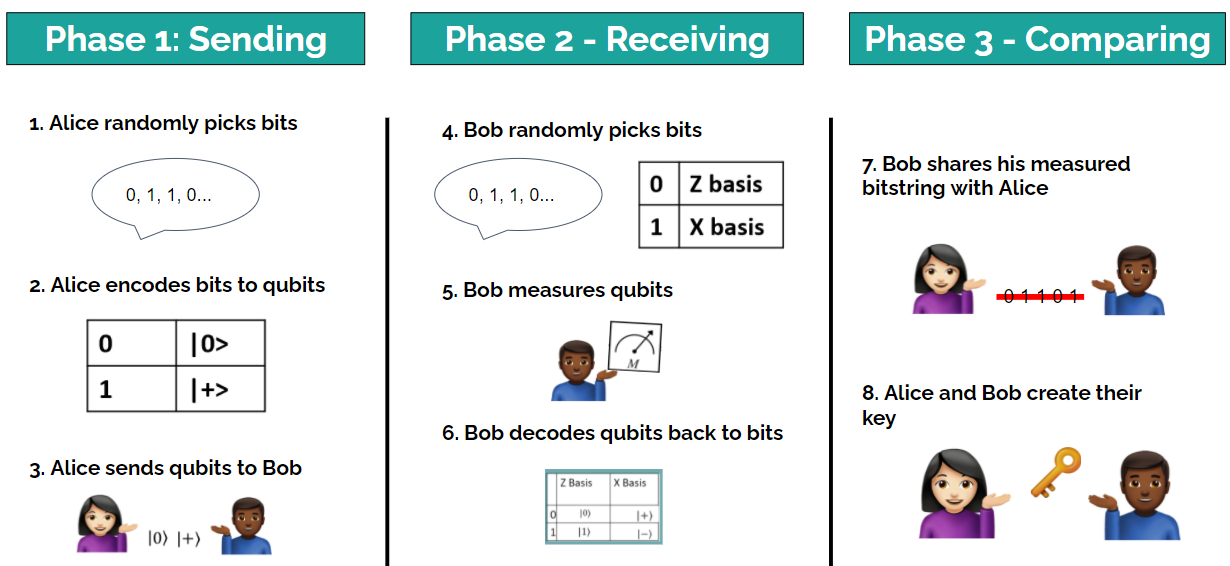

Now that we understand the protocol, let's code each of the steps!

As usual, we begin by importing all the libraries we will use:

In [19]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer
from copy import deepcopy

from random import getrandbits

print("Libraries imported successfully!")

Libraries imported successfully!


## Coding cheat sheet:
### Defining a quantum circuit: 
```python
qc = QuantumCircuit(1,1) # Define a 1 qubit, 1 classical bit quantum circuit

qc.x(0) #Add an X gate
qc.h(0) #Add an H gate
qc.z(0) #Add a Z gate
qc.y(0) #Add a Y gate

qc.draw() #Draw the circuit
```

### Using the qasm simulator:
First we have to add measurement gates:

``` python
qc.measure_all() #adds measurements
```
Next
``` python
qsim = Aer.get_backend('qasm_simulator') # Change statevector to qasm
job = execute(qc, backend=qsim, shots=1000) # add shots - tell it how many times to run, more shots = lower noise
result = job.result()
```

Lastly, we can visualise the output in histogram form:
``` python
counts = result.get_counts(qc)
plot_histogram(counts)
```

### Using a real quantum computer:

First we need to find the least busy backend:
```python
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
```

Next we can send the job to be run"
``` python
job = execute(qc, backend=backend, shots=100)
result = job.result()
```

Lastly, we can again plot the results in the same way:

``` python
counts = result.get_counts(qc)
plot_histogram(counts)
```

<a id="step1"></a>
## Phase 1 - Sending 
### Step 1 - Alice randomly generates bits

In this step, Alice randomly generates a list of bits. We will call this list of bits `alice_bits`.

Create a function to genrate `alice_bits`, a list of random bits. Use the `getrandbits` function to randomly generate bits. **Keep the bits as integers - do not convert them to strings before appending them to `alice_bits`.** We will need to perform numerical operations on these bits later in the protocol.

In [20]:
# BLOCK 1 - Write a function uising getrandbits to generate Alice's list random bits
def generate_alice_bits(length):
    alice_bits = []
    # TODO
    return alice_bits


In [21]:
# BLOCK 2 - Use your function to generate alice_bits
N = 500 # This is the number of bits we want to generate
alice_bits = generate_alice_bits(N)

<a id="step3"></a>
### Step 2 - Alice encodes the classical bits into qubits


The table below summarizes the qubit states Alice sends, based on the bit in `alice_bits`:

| Bit in `alice_bits` | Qubit state sent |
|:--------------------------:|:---------------:|
| 0 |$$|0\rangle$$ |
| 1 |$$|+\rangle$$ |

We will store the encoded qubits as a list of quantum circuits in a list called `encoded_qubits`. In the block below, write a function to generate encoded_qubits using this encoding scheme. As in our BB84 implementation, implement each qubit as a separate quantum circuit, and do not add measurements to these circuits yet.

In [22]:
#BLOCK 3 - Write a function to encode Alice's qubits using the table given above
def encode(alice_bits):
    encoded_qubits = []
    # TODO
    return encoded_qubits

In [23]:
# BLOCK 4 - Call the function from the previous block to create Alice's list of encoded qubits
encoded_qubits = encode(alice_bits)

## Step 3 - Alice sends qubits to Bob

### There's nothing we need to code here. Alice would send the qubits to Bob (maybe through a fiber optic cable)

## Phase 2 - Receiving 

### Step 4 - Bob randomly generates bits to measure Alice's qubits

In this step, Bob randomly generates a list of bits. We will call this list `bob_bits`. If a bit in this list is 0, Bob measures in the Z basis. If it is 1, Bob measures in the X basis. This is summarized in the table below:

| bit in bob_bits | Measurement Basis |
|:----------------:|:--------------------------:|
| 0 | Z |
| 1 | X |

Write a function to generate the list `bob_bits`. Keep in mind that this is a list of 0s and 1s, not Xs and Zs. We will need to make numerical comparisons on this list in a later step, which is why we are not using Xs and Zs here. Keep the bits as integers - do not convert them into strings before appending them to `bob_bits`.

In [24]:
#BLOCK 5  - Write a function to generate bob_bits
def generate_bob_bits(length):
    bob_bits = []
    # TODO
    return bob_bits

In [25]:
# BLOCK 6 - Call your function from the previous block to generate bob_bits
bob_bits = generate_bob_bits(N)

### Step 5 & 6 - Bob makes measurements and converts qubits into bits

Bob now has to measure the qubits using the random bases that he chose in the previous step and generates his list of decoded bits called `bob_measurements`. 

Write a function to make measurements on `encoded_qubits` using the bases given by `bob_bits` using the QASM simulator and `shots = 1`. From the measurement on each qubit, extract the counts and use the same code as in the BB84 implementation to find whether the measurement was 0 or 1. Add this measured bit to `bob_measurements`.

In [26]:
#BLOCK 7 - Write a function to measure Alice's qubits using bob_bits and generate bob_measurements
def measure(encoded_qubits, bob_bits):
    bob_measurements= []
    # TODO
    return bob_measurements


In [27]:
# Block 8 - Use your function from the previous block to generate bob_bits
bob_measurements = measure(encoded_qubits, bob_bits)

## Phase 3 - Comparing
### Step 7 - Bob shares his measured bits with Alice

Alice and Bob publicly analyze Bob's bits that he measured in the previous step (`bob_measurements`). They find which qubits Bob measured to be 1, which can only happen if the corresponding bits in `alice_bits` and `bob_bits` are opposite. You can visualize this from the table below:

| bit in alice_bits | State Alice sends | bit in bob_bits | basis Bob measures in | Possible result and probability | bit Bob decodes (i.e. bit in bob_measurements) | Do the bits in alice_bits and bob_bits match? |
|:----------------:|:--------------------------:|:---------------:|:---------------:|:---------------:|:---------------:|:---------------:|
| 0 |$$|0\rangle$$ | 0 | Z | $$|0\rangle$$ with 100% probability | 0 | Yes |
| 1 |$$|+\rangle$$ | 0 | Z | $$|0\rangle$$ with 50% probability | 0 | No |
| 1 |$$|+\rangle$$ | 0 | Z | $$|1\rangle$$ with 50% probability | 1 | No |
| 0 |$$|0\rangle$$ | 1 | X | $$|+\rangle$$ with 50% probability | 0 | Yes |
| 0 |$$|0\rangle$$ | 1 | X | $$|-\rangle$$ with 50% probability | 1 | No |
| 1 |$$|+\rangle$$ | 1 | X | $$|+\rangle$$ with 100% probability | 0 | Yes |

In the blocks below, write a function to create a list called `bob_one_indices` that will store the indices of all the bits in `bob_measurements` that are 1. Call the function to generate `bob_one_indices`.

Try printing the length of `bob_one_indices`. What would you expect it to be approximately, given that Alice sent Bob N=500 qubits?

In [28]:
#BLOCK 9 - Write a function to analyze bob_measurements and save the indices where bob_measurements is 1
def find_bob_ones(bob_bits):
    bob_one_indices = []
    # TODO
    return bob_one_indices

In [29]:
# Block 10 - Call the function in the previous block to generate bob_one_indices. 
# Print its length - approximately how long do you expect this list to be?

bob_one_indices = find_bob_ones(bob_measurements)
len(bob_one_indices) # Checking the length of bob_one_indices

117

We would expect about half the time, the bits in `bob_bits` and `alice_bits` will match, since they're both randomly choosing between 0 and 1. The other half of the bits in `bob_bits` and `alice_bits` do not match. Of these times, about half the time Bob will measure a 0 (refer the table above to verify this) and half the time Bob will measure a 1. Therefore, we would expect about 1/4th of the bits in `bob_measurements` to be 1, i.e., we'd expect to get about 125 1's in `bob_measurements`. Is that the approximate length of `bob_one_indices` that you got?

### Step 8 - Alice and Bob generate their key

Final step! Alice and Bob generate their key by dropping all the bits (from `alice_bits` and `bob_bits`) where Bob measured a 0 (i.e., when `bob_measurements` was 0) and only keeping those for which Bob meausured a 1 (i.e., when `bob_measurements` was 1). Alice inverts the bits in `alice_bits` that she keeps.

In the coding blocks below, write a function to generate Alice's key (`alice_key`) by appending the inverse of the bits from `alice_bits` corresponding to the indices in `bob_one_indices`. Similarly, write another function to generate Bob's key (`bob_key`) by appending the bits from `bob_bits` corresponding to the indices in `bob_one_indices` (without inverting). Call both these functions to generate Alice and Bob's keys!

In [30]:
#BLOCK 11 - Write a function to create Alice's key

def generate_alice_key(alice_bits, bob_one_indices):
    alice_key = []
    # TODO
    return alice_key

In [31]:
#BLOCK 12 - Write a function to create Bob's key

def generate_bob_key(bob_baits, bob_one_indices):
    bob_key = []
    # TODO
    return bob_key

In [32]:
# BLOCK 13 - Call these functions to generate Alice and Bob's keys!
alice_key = generate_alice_key(alice_bits, bob_one_indices)
bob_key = generate_bob_key(bob_bits, bob_one_indices)

Let's check if Alice and Bob's keys match!

In [36]:
#BLOCK 14 - Check if these keys are the same

print(alice_key[:10])
print(bob_key[:10])
if (alice_key == bob_key):
    print("Success the keys match!")
else:
    print("The keys don't match, check your code and try again!")

[0, 0, 0, 1, 0, 0, 1, 1, 0, 1]
[0, 0, 0, 1, 0, 0, 1, 1, 0, 1]
Success the keys match!


That's the protocol! Alice and Bob now have a identical private keys that they can use to securely communicate!

## Encryping and decrypting messages using the key

Once the key is generated, Alice and Bob can use it to send and receive messages! In the block below, we have created two helper functions `encrypt_message` and `decrypt_message` to encrypt and decrypt the message. `encrypt_message` takes the unencrypted message along with the key to encode the message, while `decrypt_message` takes the encrypted message and the key to decrypt the message.

In [34]:
# BLOCK 15 - creating helper functions to encrypt and decrypt messages using QKD

import binascii

def encrypt_message(unencrypted_string, key):
    # Convert ascii string to binary string
    bits = bin(int(binascii.hexlify(unencrypted_string.encode('utf-8', 'surrogatepass')), 16))[2:]
    bitstring = bits.zfill(8 * ((len(bits) + 7) // 8))
    # created the encrypted string using the key
    encrypted_string = ""
    for i in range(len(bitstring)):
        encrypted_string += str( (int(bitstring[i])^ int(key[i])) )
    return encrypted_string
    
def decrypt_message(encrypted_bits, key):
    # created the unencrypted string using the key
    unencrypted_bits = ""
    for i in range(len(encrypted_bits)):
        unencrypted_bits += str( (int(encrypted_bits[i])^ int(key[i])) )
    # Convert bitstring into
    i = int(unencrypted_bits, 2)
    hex_string = '%x' % i
    n = len(hex_string)
    bits = binascii.unhexlify(hex_string.zfill(n + (n & 1)))
    unencrypted_string = bits.decode('utf-8', 'surrogatepass')
    return unencrypted_string

In the block below, use these two functions to encrypt and decrypt the message using the key you had generated earlier!

In [35]:
# BLOCK 16 - sending and receiving messages using QKD

message = "QKD is cool!"
print("Original Messge:", message)
encrypted_message = encrypt_message(message, alice_key)
print("Encrypted message:", encrypted_message)
decrypted_message = decrypt_message(encrypted_message, bob_key)
print("Decrypted message:", decrypted_message)

Original Messge: QKD is cool!
Encrypted message: 010000100011011001110001001011101100000100001000001010001101101110100000000000011111111100010000
Decrypted message: QKD is cool!


## Optional extensions

We did not implement an eavesdropper in this protocol so far. The eavesdropper would intercept Alice's qubits, make measurements on them, and then pass on the qubits (after they have been measured) to Bob to try to evade detection, just like with BB84. Can you implement an eavesdropper function and show that in the presence of an eavesdropper, Alice and Bob's keys will not match? Therefore, Alice and Bob can detect the eavesdropper's presence by comparing the first few bits of their keys and checking for any differences!

Suppose Alice and Bob check the first 20 bits of their keys. What is the probability of successful eavesdropping? How does it compare to BB84?

Can you think of any other eavesdropping strategies that would be more successful?

### © 2022 The Coding School

**All rights reserved**

*Use of this activity is for personal use only. Copying, reproducing, distributing, posting or sharing this activity in any manner with any third party are prohibited under the terms of this registration. All rights not specifically licensed under the registration are reserved.*